In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_pickle('/home/ethan/GrowthCurve/data/GrowthCurve.pkl')

# Make plots for OD Dsitribution over concnetration/time pairs

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plot_hist_od_distributions(df, concentration, max_density):
    timepoints = ['t_0', 't_2.08', 't_4.16', 't_6.24', 't_8.32', 't_10.4', 't_12.48']
    labels = [-1, 0, 1]
    colors = { -1: '#1f77b4', 0: '#ff7f0e', 1: '#2ca02c' }
    label_names = {-1: "Negative Control", 0: "Test Compound", 1: "Positive Control"}

    # Filter the data based on the given concentration
    df_sub = df[df['Concentration'] == concentration]
    
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
    axes = axes.flatten()

    for i, time in enumerate(timepoints):
        ax = axes[i]
        # Plot histograms for each control label group
        for label in labels:
            subset = df_sub[df_sub['Control_Label'] == label]
            ax.hist(
                subset[time],
                bins=30,
                alpha=0.3,
                density=True,
                label=label_names[label],  # Use descriptive label names
                color=colors[label],
                histtype='stepfilled',
                edgecolor='black',
                linewidth=0.7
            )
        # Calculate median and MAD for Test Compounds at the current timepoint (Control_Label == 0)
        test_subset = df_sub[df_sub['Control_Label'] == 0]
        median_val = test_subset[time].median()
        mad_val = np.median(np.abs(test_subset[time].dropna() - median_val))
        print(f'{concentration} median_val - 2 * mad_val: {median_val - 2 * mad_val}')
        
        # Plot vertical lines for the median and median minus 1, 2, and 3 MAD.
        # Label the lines only on the first subplot to avoid duplicate entries in the legend.
        if i == 0:
            ax.axvline(median_val, color='black', linestyle='--', linewidth=1.5, label='Test Compound Median')
            ax.axvline(median_val - mad_val, color='red', linestyle=':', linewidth=1.5, label='Median - 1*MAD')
            ax.axvline(median_val - 2 * mad_val, color='orange', linestyle=':', linewidth=1.5, label='Median - 2*MAD')
            ax.axvline(median_val - 3 * mad_val, color='green', linestyle=':', linewidth=1.5, label='Median - 3*MAD')
        else:
            ax.axvline(median_val, color='black', linestyle='--', linewidth=1.5)
            ax.axvline(median_val - mad_val, color='red', linestyle=':', linewidth=1.5)
            ax.axvline(median_val - 2 * mad_val, color='orange', linestyle=':', linewidth=1.5)
            ax.axvline(median_val - 3 * mad_val, color='green', linestyle=':', linewidth=1.5)
        
        ax.set_title(f'{time}')
        ax.set_xlabel('OD')
        ax.set_ylabel('Density')
        ax.grid(True, linestyle='--', alpha=0.5)
        
        # Set the y-axis limit to ensure consistency across subplots
        ax.set_ylim(0, max_density)

    # Remove any extra subplots
    for j in range(len(timepoints), len(axes)):
        fig.delaxes(axes[j])

    # Get handles and update the legend based on the descriptive labels and added vertical lines
    handles, legend_labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, legend_labels, loc='upper right', title='Control_Label')
    
    fig.suptitle(f'OD Distributions at Concentration {concentration} (Histograms)', fontsize=16)
    plt.tight_layout(rect=[0, 0, 0.95, 0.95])
    plt.savefig(f'/home/ethan/GrowthCurve/plots/OD_control_dist_{concentration}.png')
    #plt.show()


array([ 0.2 ,  7.9 ,  3.13, 12.5 , 50.  ,  1.2 ])

# plot_hist_od_distributions

0.2 median_val - 2 * mad_val: 0.0
0.2 median_val - 2 * mad_val: 0.1249841070192795
0.2 median_val - 2 * mad_val: 0.42695050787004596
0.2 median_val - 2 * mad_val: 0.636591478696741
0.2 median_val - 2 * mad_val: 0.775625063265513
0.2 median_val - 2 * mad_val: 0.8614203352905239
0.2 median_val - 2 * mad_val: 0.9245511476644389


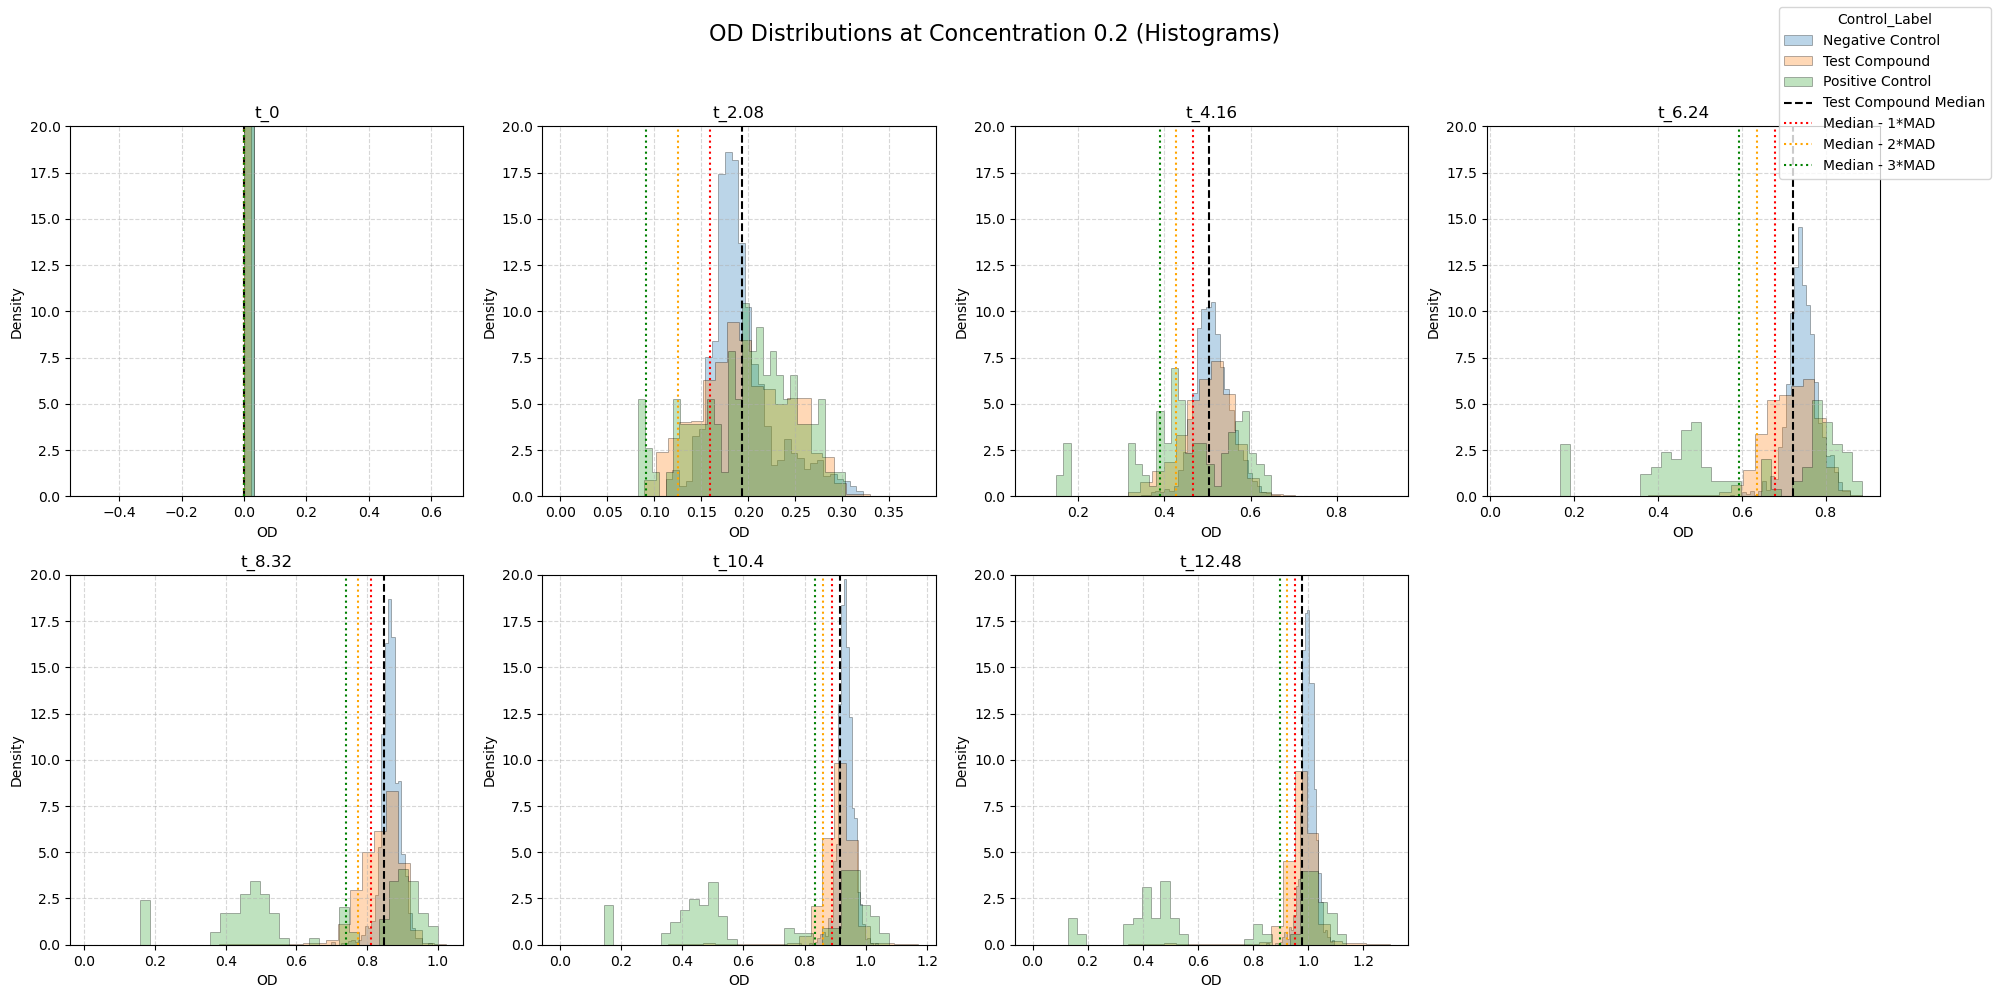

In [4]:
plot_hist_od_distributions(df,0.2, 20)

0.781 median_val - 2 * mad_val: 0.0
0.781 median_val - 2 * mad_val: 0.1713781549684775
0.781 median_val - 2 * mad_val: 0.48307319255203174
0.781 median_val - 2 * mad_val: 0.6230012256117805
0.781 median_val - 2 * mad_val: 0.7367121105087069
0.781 median_val - 2 * mad_val: 0.8421479278653301
0.781 median_val - 2 * mad_val: 0.9437434391599948


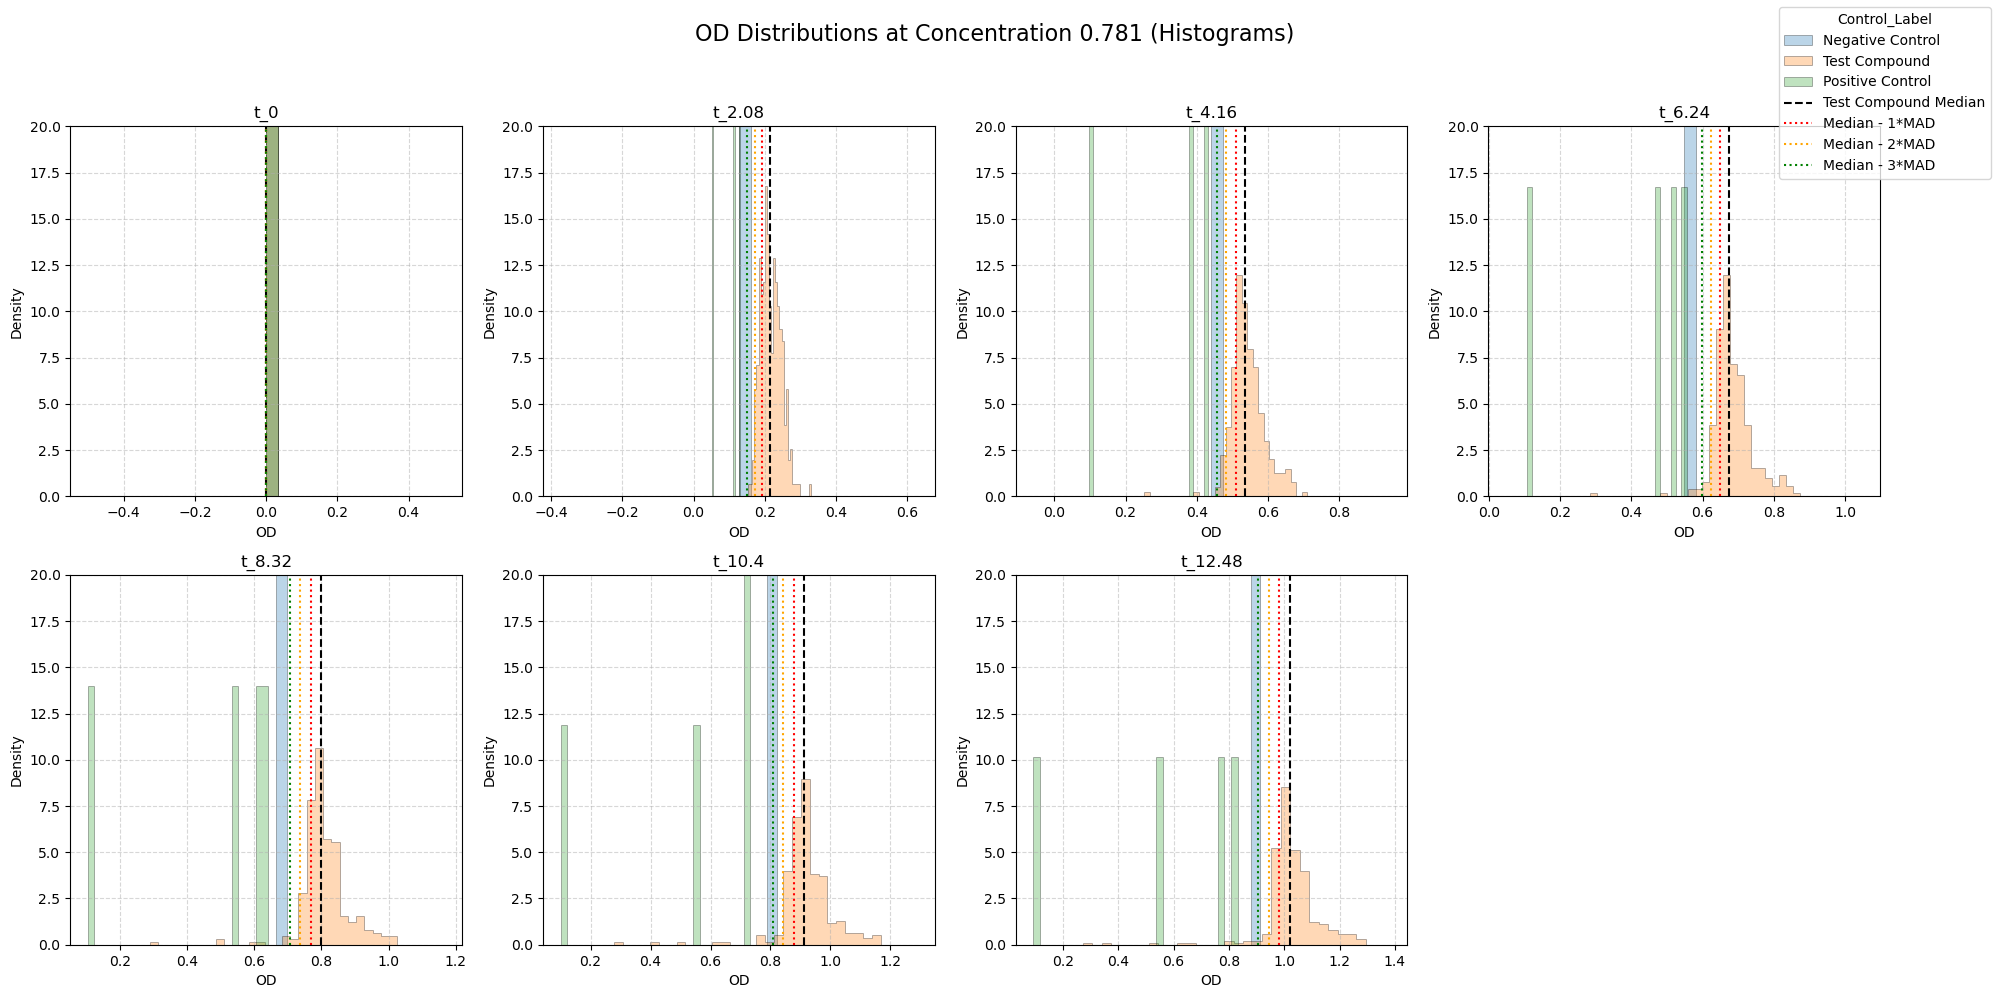

In [5]:
plot_hist_od_distributions(df,0.781,20)

1.2 median_val - 2 * mad_val: 0.0
1.2 median_val - 2 * mad_val: 0.095030342791536
1.2 median_val - 2 * mad_val: 0.37876908601000797
1.2 median_val - 2 * mad_val: 0.626695564088671
1.2 median_val - 2 * mad_val: 0.7677825065108318
1.2 median_val - 2 * mad_val: 0.8474669603524231
1.2 median_val - 2 * mad_val: 0.9141114392215681


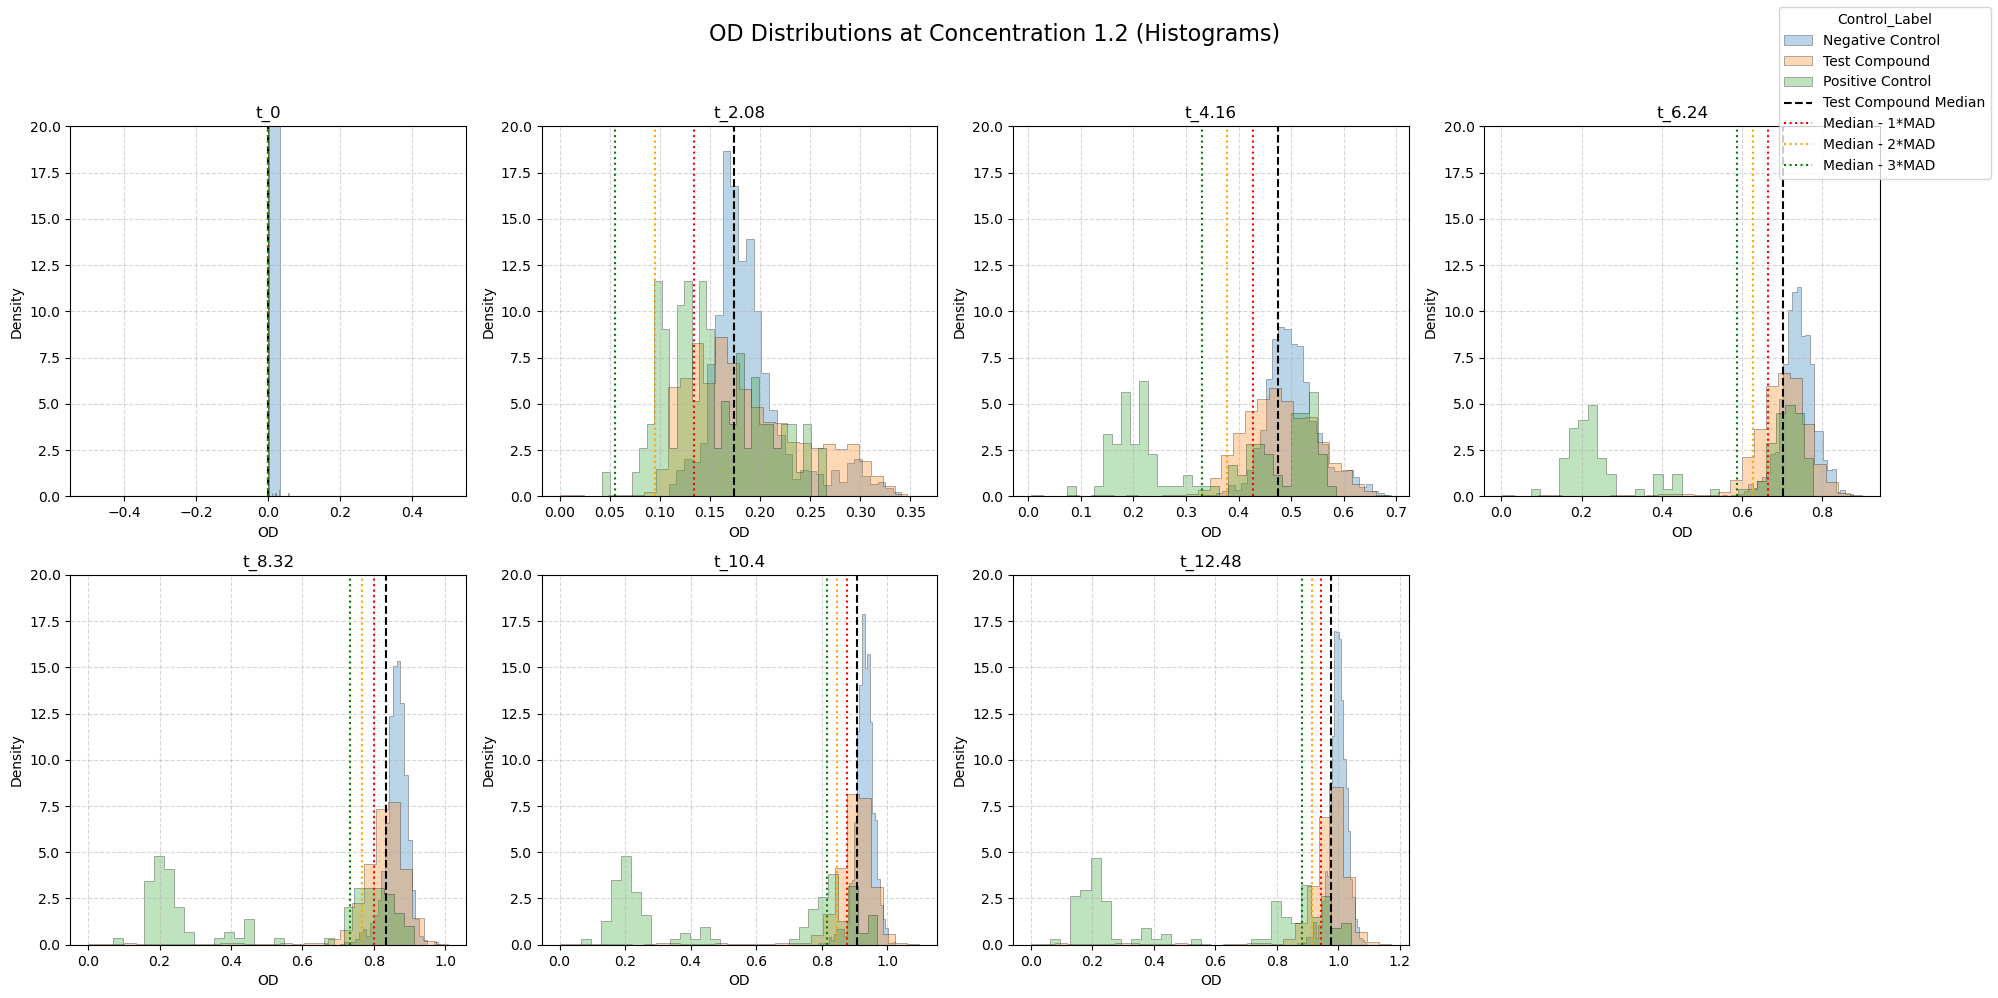

In [6]:
plot_hist_od_distributions(df,1.2,20)

3.13 median_val - 2 * mad_val: 0.0
3.13 median_val - 2 * mad_val: 0.17387696062461502
3.13 median_val - 2 * mad_val: 0.4806716051698612
3.13 median_val - 2 * mad_val: 0.6215210267836662
3.13 median_val - 2 * mad_val: 0.7393302949290097
3.13 median_val - 2 * mad_val: 0.8449804519997071
3.13 median_val - 2 * mad_val: 0.9435602808955952


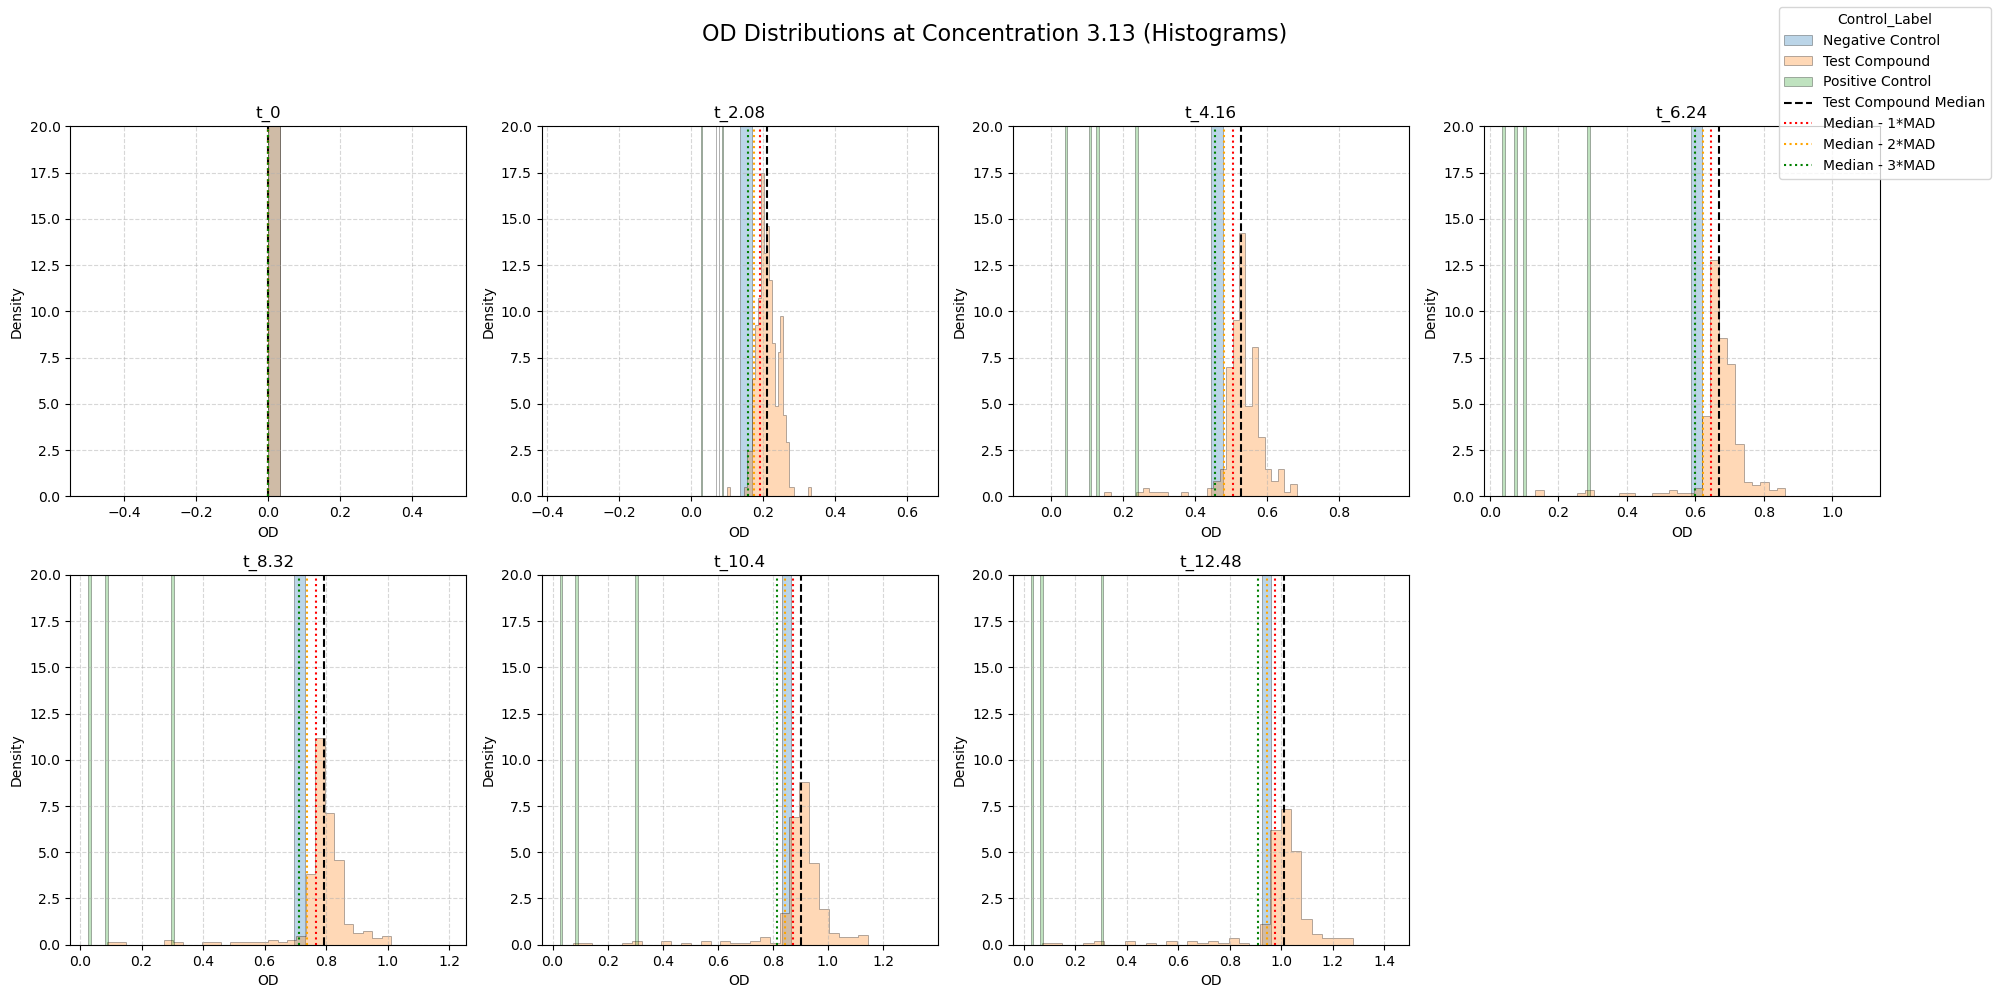

In [7]:
plot_hist_od_distributions(df,3.13,20)

7.9 median_val - 2 * mad_val: 0.0
7.9 median_val - 2 * mad_val: 0.08908839779005498
7.9 median_val - 2 * mad_val: 0.36099573238257304
7.9 median_val - 2 * mad_val: 0.5979977234509365
7.9 median_val - 2 * mad_val: 0.736731221132809
7.9 median_val - 2 * mad_val: 0.8266007268367611
7.9 median_val - 2 * mad_val: 0.8977904340030483


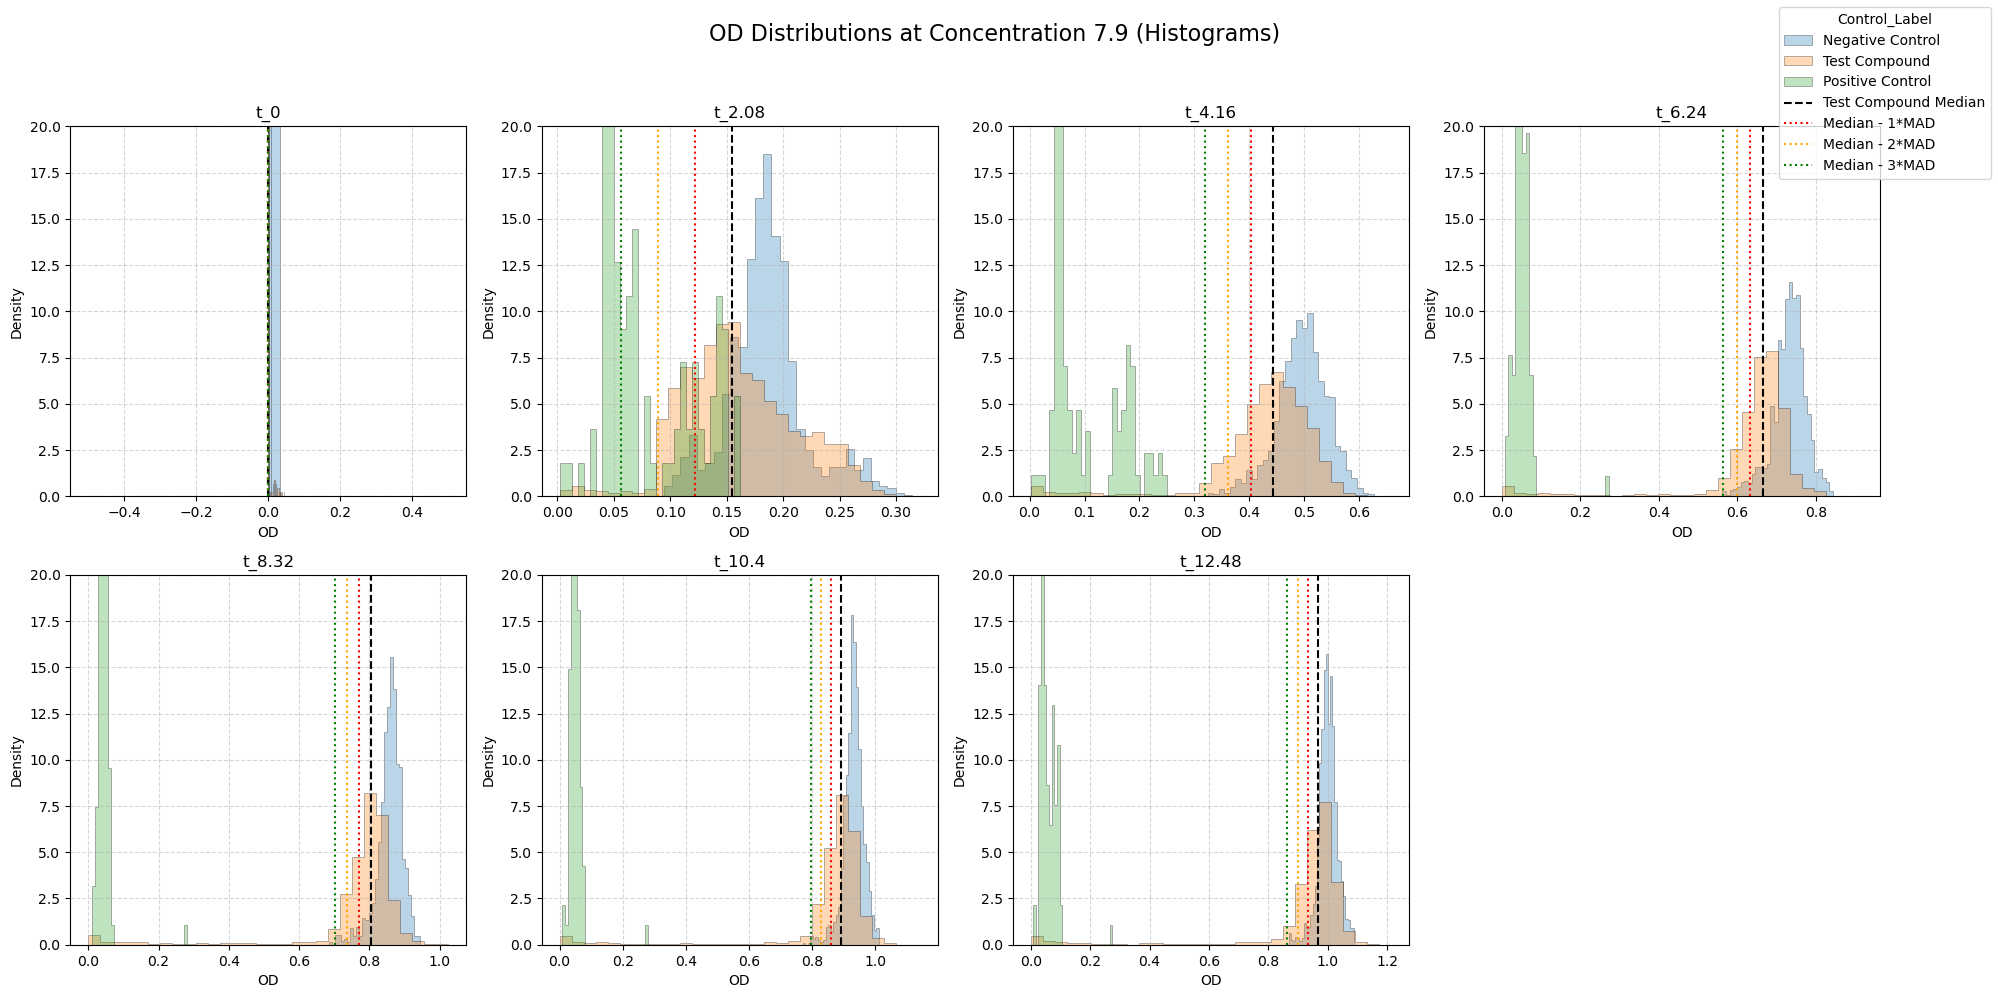

In [8]:
plot_hist_od_distributions(df,7.9,20)

12.5 median_val - 2 * mad_val: 0.0
12.5 median_val - 2 * mad_val: 0.1665627066770675
12.5 median_val - 2 * mad_val: 0.46919834484629075
12.5 median_val - 2 * mad_val: 0.6043628262854722
12.5 median_val - 2 * mad_val: 0.7106088928361736
12.5 median_val - 2 * mad_val: 0.8129545974288205
12.5 median_val - 2 * mad_val: 0.9128745620853378


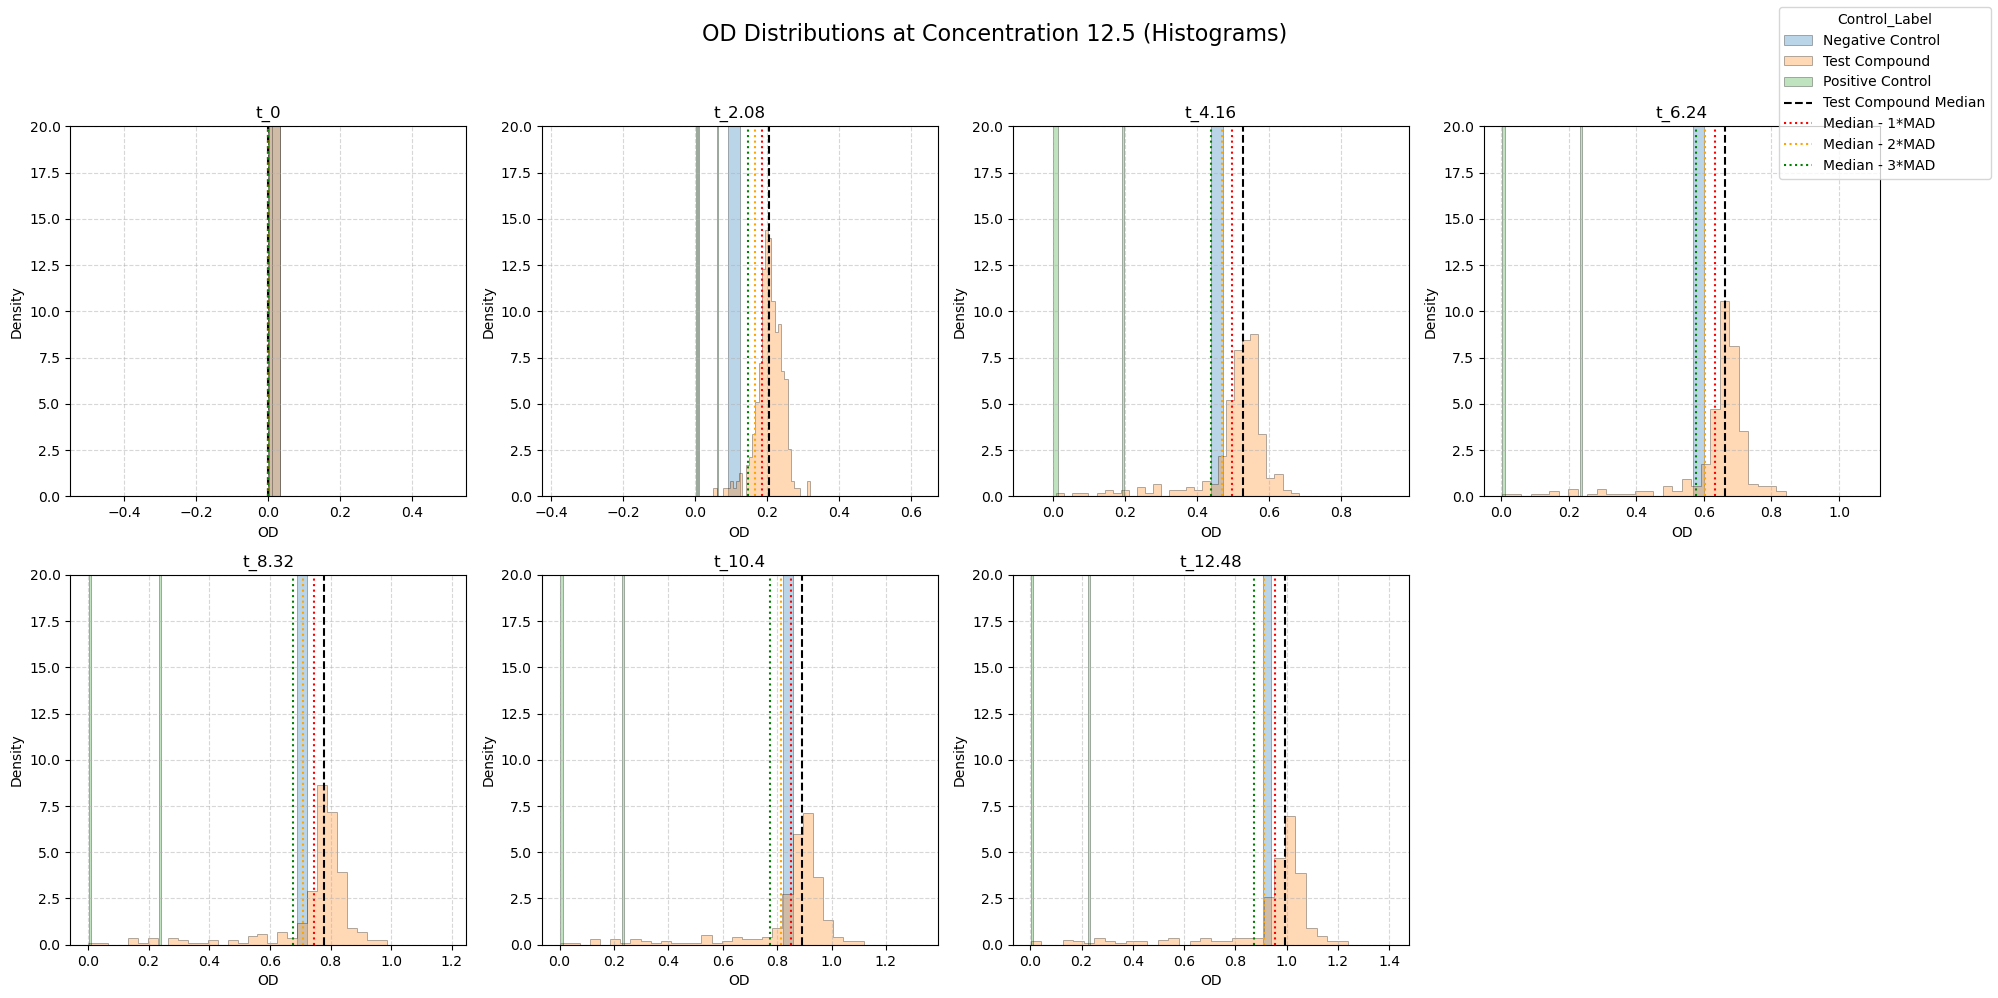

In [9]:
plot_hist_od_distributions(df,12.5,20)

50 median_val - 2 * mad_val: 0.0
50 median_val - 2 * mad_val: 0.07508647459912302
50 median_val - 2 * mad_val: 0.328675113006941
50 median_val - 2 * mad_val: 0.5367834377625349
50 median_val - 2 * mad_val: 0.692371701525021
50 median_val - 2 * mad_val: 0.79782411381103
50 median_val - 2 * mad_val: 0.926356122767792


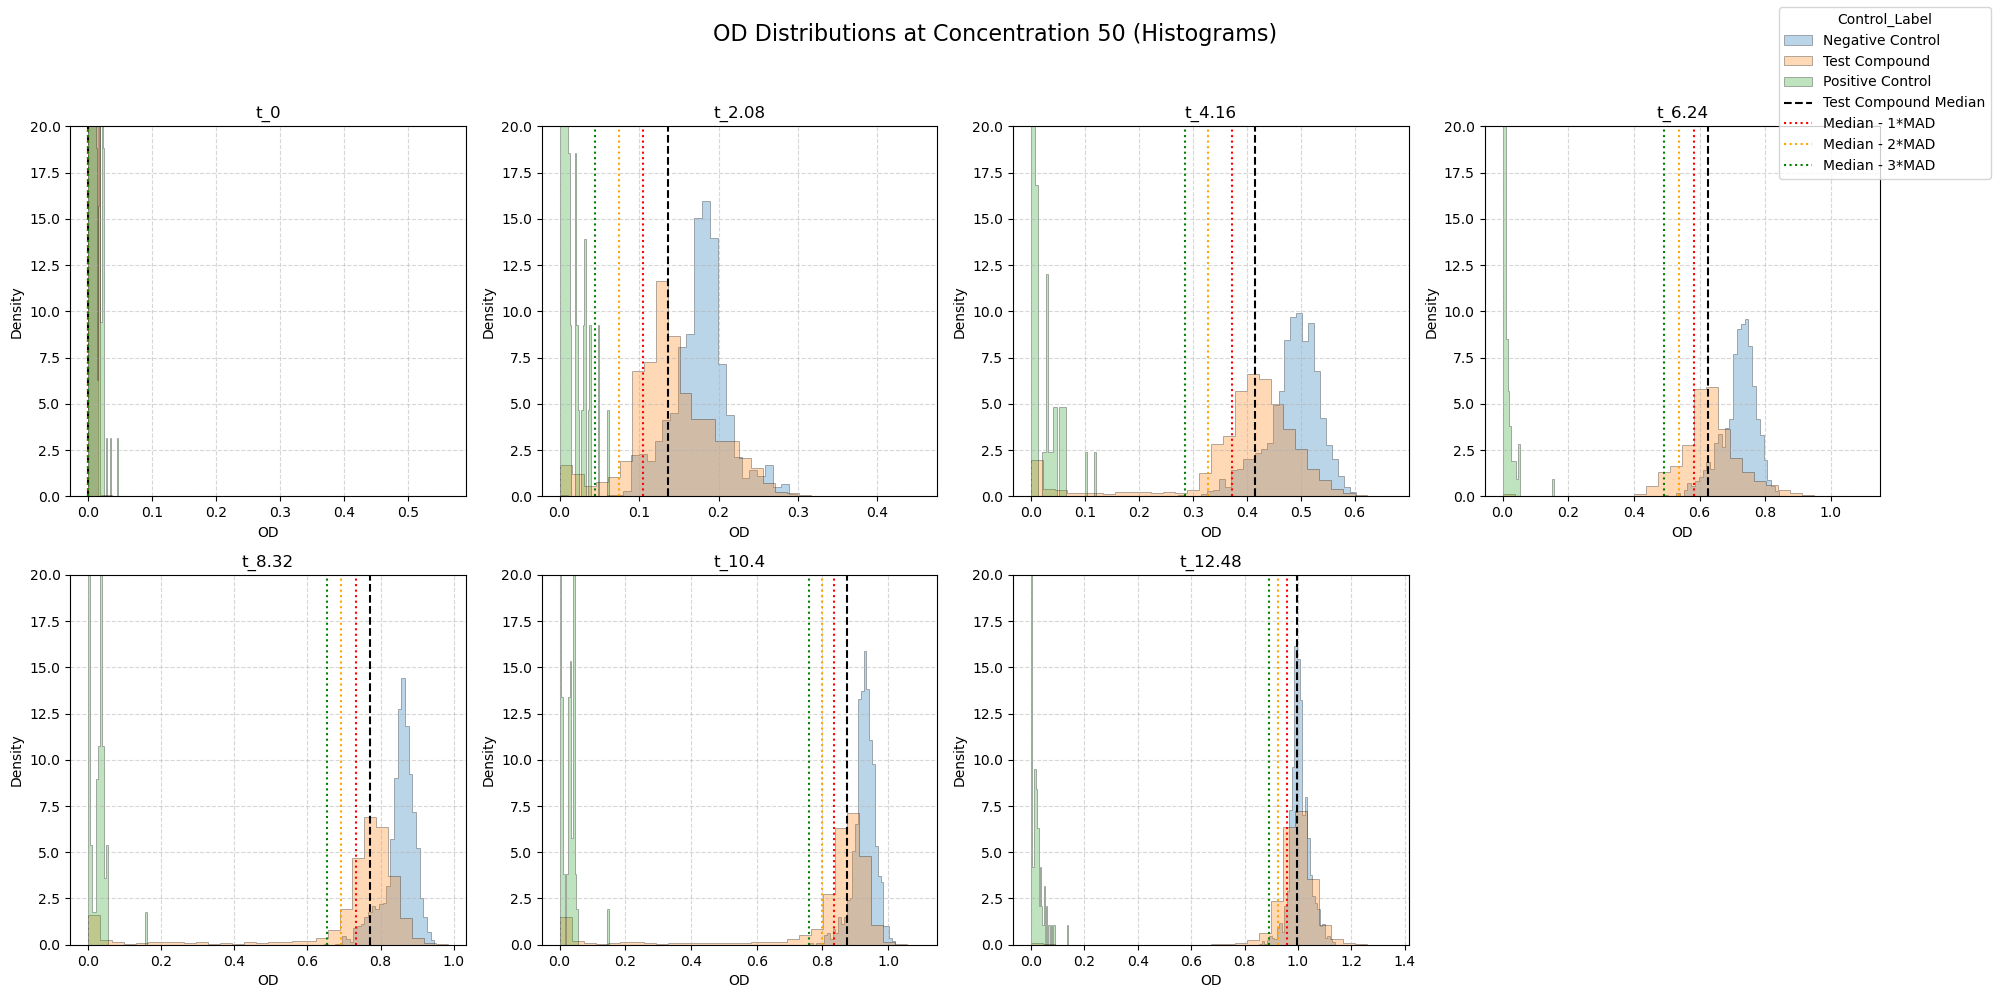

In [90]:
plot_hist_od_distributions(df,50,20)

In [81]:
df=pd.read_pickle('/home/ethan/GrowthCurve/data/GrowthCurve_processed.pkl')

# For a fixed concetration, what compounds are below the threwshold

In [21]:
import numpy as np
import pandas as pd

def get_below_median_2MAD_features(df, concentration):
    """
    For a given concentration, create a dataframe of test compounds with a binary feature
    for each timepoint indicating if the compound's measurement is below the (median - 2*MAD)
    threshold for that timepoint. For controls, no row is returned.
    
    Parameters:
      df           : pandas.DataFrame, must include columns 'Concentration', 'Control_Label', and timepoints.
      concentration: The fixed concentration value (e.g., 0.2, 0.781, etc.)
    
    Returns:
      A new DataFrame with the test compound identifier (from the 'Compound' column, if present)
      and seven binary columns (one per timepoint) named 'BelowMedian2MAD_t_0', etc.
    """
    # List of timepoint columns
    timepoints = ['t_0', 't_2.08', 't_4.16', 't_6.24', 't_8.32', 't_10.4', 't_12.48']
    
    # Filter for test compounds at the provided concentration
    df_test = df[(df['Concentration'] == concentration) & (df['Control_Label'] == 0)]
    
    # Compute thresholds for each timepoint: threshold = median - 2*MAD
    thresholds = {}
    for t in timepoints:
        # Use only non-missing values
        values = df_test[t].dropna()
        if len(values) == 0:
            thresholds[t] = np.nan
        else:
            median_val = values.median()
            mad_val = np.median(np.abs(values - median_val))
            thresholds[t] = median_val - 2 * mad_val

    # Create a new dataframe. Assume that the test compound's identifier is in a column named "Compound".
    # If your dataframe uses a different column name for the compound identifier, change "Compound" accordingly.
    if 'Compound' in df_test.columns:
        new_df = df_test[['Compound']].copy()
    else:
        # If no such column exists, use the dataframe index as the identifier.
        new_df = df_test.copy()
        new_df.index.name = 'Compound'
        new_df = new_df.reset_index()[['Compound']]  # keep only the identifier

    # For each timepoint, create a binary feature column that is 1 if the compound's value 
    # is below the threshold for that timepoint, and 0 otherwise.
    for t in timepoints:
        col_name = f'BelowMedian2MAD_{t}'
        th_val = thresholds[t]
        # When threshold is NaN, the result of the comparison will be False (0).
        new_df[col_name] = np.where(df_test[t] < th_val, 1, 0)
    
    return new_df


In [22]:
df_50=get_below_median_2MAD_features(df,50)
binary_cols = [col for col in df_50.columns if col.startswith('BelowMedian2MAD_')]

# Filter to keep only rows where at least one of these binary columns is 1
df_50_filtered = df_50[df_50[binary_cols].eq(1).any(axis=1)]
df_50_filtered

,Compound,BelowMedian2MAD_t_0,BelowMedian2MAD_t_2.08,BelowMedian2MAD_t_4.16,BelowMedian2MAD_t_6.24,BelowMedian2MAD_t_8.32,BelowMedian2MAD_t_10.4,BelowMedian2MAD_t_12.48
9,Z1130073185,0,0,0,0,1,1,1
19,Z1143251035,0,1,1,1,1,1,1
24,Z115666676,0,0,0,0,1,1,1
59,Z1207296292,0,0,0,0,1,1,1
64,Z1223049609,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...
51465,Z997798486,0,0,0,1,0,0,1
51473,Z997824164,0,0,0,1,0,0,0
51474,Z997825532,0,0,0,0,0,0,1
51481,Z998864272,0,0,0,1,0,0,0


In [23]:
# List of binary timepoint columns, excluding 't_0'
relevant_cols = [col for col in df_50_filtered.columns if col.startswith('BelowMedian2MAD_') and 't_0' not in col]

# Identify which compounds have at least two 1s across these timepoints
df_50_filtered = df_50_filtered.copy()
df_50_filtered['Active'] = (df_50_filtered[relevant_cols].sum(axis=1) >= 2).astype(int)



In [28]:
active_compounds = df_50_filtered[df_50_filtered['Active'] == 1]['Compound']

# Step 2: Add 'Active' column to df and initialize to 0
df['Active'] = 0

# Step 3: Set Active = 1 for matching Compounds
df.loc[df['Compound'].isin(active_compounds), 'Active'] = 1

In [31]:
df

,Compound,Concentration,Well,t_0,t_2.08,t_4.16,t_6.24,t_8.32,t_10.4,t_12.48,Smiles,Plate_ID,Control_Label,Active
0,Z1084007582,0.200,K22,0.0,0.182564,0.541308,0.693232,0.813239,0.926863,1.030273,[O-][N+](=O)C=1C=CC=NC1SC2=NN=C(CC=3C=CC=CC3F)O2,111-DR1,0,0
1,Z1084007582,0.781,K21,0.0,0.182564,0.520882,0.662592,0.776216,0.887286,0.991973,[O-][N+](=O)C=1C=CC=NC1SC2=NN=C(CC=3C=CC=CC3F)O2,111-DR1,0,0
2,Z1084007582,3.130,K20,0.0,0.171074,0.514498,0.649825,0.758342,0.865583,0.967716,[O-][N+](=O)C=1C=CC=NC1SC2=NN=C(CC=3C=CC=CC3F)O2,111-DR1,0,0
3,Z1084007582,12.500,K19,0.0,0.182564,0.511945,0.653655,0.772386,0.888563,0.994526,[O-][N+](=O)C=1C=CC=NC1SC2=NN=C(CC=3C=CC=CC3F)O2,111-DR1,0,0
4,Z1084007582,50.000,K18,0.0,0.181287,0.513222,0.661315,0.790259,0.906436,1.016230,[O-][N+](=O)C=1C=CC=NC1SC2=NN=C(CC=3C=CC=CC3F)O2,111-DR1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51718,DMSO,50.000,NaN,0.0,NaN,NaN,0.590851,NaN,NaN,1.096532,None,1886318-Y12-A096,-1,0
51719,DMSO,50.000,NaN,0.0,NaN,NaN,0.597467,NaN,NaN,1.089052,None,1886318-Y12-A097,-1,0
51720,DMSO,50.000,NaN,0.0,NaN,NaN,0.606190,NaN,NaN,1.097033,None,1886318-Y12-A098,-1,0
51721,DMSO,50.000,NaN,0.0,NaN,NaN,0.614978,NaN,NaN,1.098136,None,1886318-Y12-A099,-1,0


# Cocnnetration Time point plots

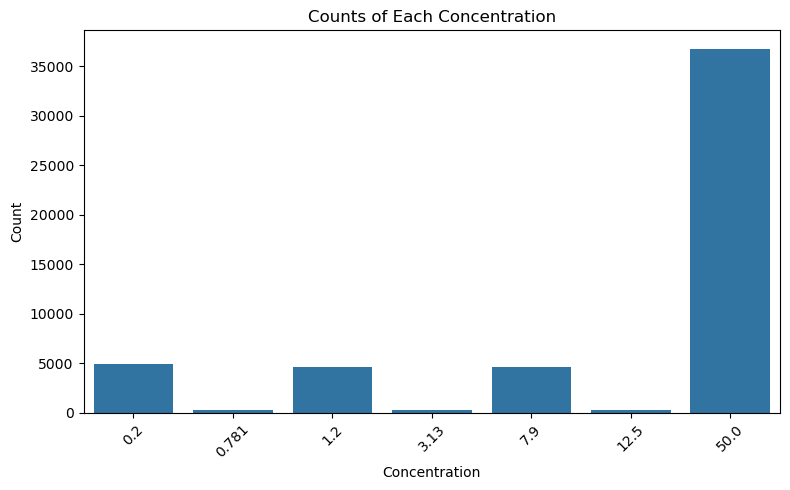

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Concentration')
plt.title('Counts of Each Concentration')
plt.xlabel('Concentration')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


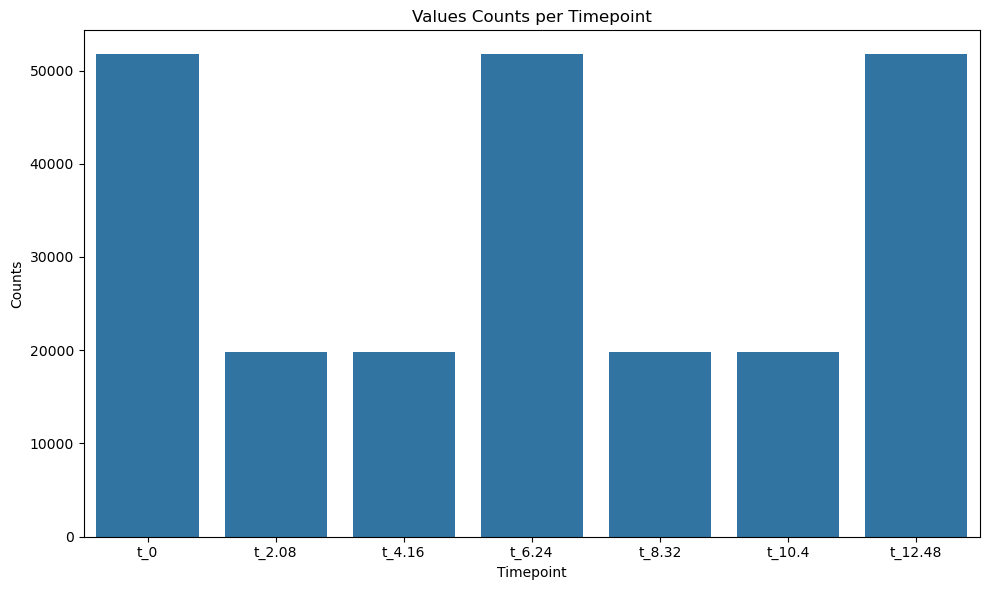

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of timepoint columns
timepoints = ['t_0', 't_2.08', 't_4.16', 't_6.24', 't_8.32', 't_10.4', 't_12.48']

# Count non-NaN values per timepoint
non_nan_counts = df[timepoints].notna().sum()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=non_nan_counts.index, y=non_nan_counts.values)
plt.title('Values Counts per Timepoint')
plt.xlabel('Timepoint')
plt.ylabel('Counts')
plt.tight_layout()
plt.show()


# Add classification label to test compounds for each conccentration based on median -2*MAD threshold

In this implementation, a compound gets active for a cocnetration if it below median -2*MAD for ALL time points. DO NOT inlcude timepoint 0 when looking for a given concentration is a compound active at all timepoints

In [91]:
df=pd.read_pickle('/home/ethan/GrowthCurve/data/GrowthCurve.pkl')

In [ ]:
import numpy as np
import pandas as pd

# List of concentrations and timepoints
concentrations = [0.2, 0.781, 1.2, 3.13, 7.9, 12.5, 50]
timepoints = ['t_0', 't_2.08', 't_4.16', 't_6.24', 't_8.32', 't_10.4', 't_12.48']

# Create a dictionary to store the thresholds for each concentration and each timepoint.
# thresholds[conc][time] will hold the computed threshold value.
thresholds = {}

for conc in concentrations:
    # Filter for Test Compounds at this concentration.
    # Adjust column names ('Concentration' and 'Control_Label') as needed.
    df_temp = df[(df['Control_Label'] == 0) & (df['Concentration'] == conc)]
    
    thresholds[conc] = {}
    for time in timepoints:
        # Drop missing values before computing median and MAD
        values = df_temp[time].dropna()
        if len(values) == 0:
            # If there are no test compounds for this concentration/time, the threshold remains NaN.
            threshold_val = np.nan
        else:
            median_val = values.median()
            # Compute MAD: median of absolute differences from the median.
            mad_val = np.median(np.abs(values - median_val))
            threshold_val = median_val - 2 * mad_val
        thresholds[conc][time] = threshold_val

# Now, add 7 new columns to the dataframe – one for each concentration.
# Each new column is 1 if, for that concentration's threshold, the compound's
# measurement is below the threshold in every timepoint; otherwise 0.
# For non-test compounds (controls), assign np.nan.

'''
thresholds is correct
'''

for conc in concentrations:
    # Define a new column name (you can adjust the naming convention).
    col_name = f'belowMedian2MAD_{conc}'
    # Initialize the new column with NaN.
    df[col_name] = np.nan

    # Create a mask for Test Compounds only.
    test_mask = df['Control_Label'] == 0

    # For the rows that are Test Compounds, check for every timepoint whether the value is below the threshold.
    # We build the condition cumulatively.
    cond = pd.Series(True, index=df.index)
    for time in timepoints:
        # Compare the value with the threshold (for the current concentration) for this timepoint.
        # We use the new column on the masked rows.
        threshold_val = thresholds[conc][time]
        # If the threshold is NaN, the result of comparison will be False.
        cond = cond & (df[time] < threshold_val)
    
    # Convert the condition to binary (1 if True, 0 if False) for the Test Compound rows.
    df.loc[test_mask, col_name] = cond[test_mask].astype(int)
    
# Now your dataframe 'df' has 7 new columns where each Test Compound row receives a 1 
# if it is below the respective "median-2*MAD" threshold for every timepoint, and 0 otherwise.
# Controls remain as NaN.


In [98]:
df['belowMedian2MAD_50'].sum()

np.float64(0.0)